In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


fs=16 #fontsize

#Colors + Labels

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

cNEDE=color_sequence[3]
cOEDE=color_sequence[4]
cADE=color_sequence[1]
cDR=color_sequence[0]
cLCDM=color_sequence[2]
cSHOES='gray'

In [2]:
#          omega_b, omega_cdm, h,  ln10^{10}A_s,    n_s, frac_EDE,  log10mass,tau_reio,trigger
EDE_params=[2.296635e-02,1.305682e-01,7.146053e-01,3.068168e+00,9.911919e-01,1.296225e-01,2.574423e+00,5.718570e-02,0.2,2.0,2.0]
#run214


frac_EDE=EDE_params[5]


EDE_Omega_EDE2=frac_EDE*(10**EDE_params[6])**2*EDE_params[8]**2 /(EDE_params[2] * 10**5 / (2.99792458*10**8))**2
print(EDE_Omega_EDE2)


#          omega_b,omega_cdm,h,ln10^{10}A_s,n_s,tau_reio, 
LCDM_params=[2.251350e-02,1.183155e-01,6.816150e-01,3.053159e+00,9.697571e-01,5.981617e-02]
#run212

 
#omega_b,omega_cdm,h,ln10^{10}A_s,n_s,N_ur,tau_reio
#run228
DR_params=[2.265457e-02,1.220806e-01,6.938808e-01,3.059755e+00,9.765032e-01,2.254938e+00,5.875083e-02]


N_ur = 2.0328
N_ncdm = 1
m_ncdm = 0.06
T_ncdm = 0.71611

12855688026.820948


In [3]:
LCDM = Class()
LCDM.set({'output':'tCl,pCl,lCl','lensing':'yes',
          'omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1],'h':LCDM_params[2],'ln10^{10}A_s':LCDM_params[3],
          'n_s':LCDM_params[4],'tau_reio':LCDM_params[5],'k_output_values':'0.00001,0.001,0.01,0.04,0.5',
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
LCDM.compute()
LCDM_bg = LCDM.get_background()
LCDM_pert = LCDM.get_perturbations()

DR = Class()
DR.set({'output':'tCl,pCl,lCl','lensing':'yes','omega_b':DR_params[0],'omega_cdm':DR_params[1],
        'h':DR_params[2],'ln10^{10}A_s':DR_params[3],'n_s':DR_params[4],'N_ur':DR_params[5],
        'tau_reio':DR_params[6],
        'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
DR.compute()
DR_bg = DR.get_background()

In [7]:
NEDE = Class()
NEDE2 = Class()





NEDE.set({'sub_dom_cond':1.e-6,'back_integration_stepsize':5.e-3,'decay_res_enhancement':100,'Junction_tag':1,
         'perturb_integration_stepsize':0.5,'three_eos_NEDE':EDE_params[9],'three_ceff2_NEDE':EDE_params[10],
         'three_cvis2_NEDE':0,'f_NEDE': 0.15,'z_decay_NEDE' : 6000,
         'H_over_m_NEDE':EDE_params[8],'k_output_values':'0.00001,0.001,0.01,0.1,0.5',
        'start_small_k_at_tau_c_over_tau_h':0.0000001,
         'output':'tCl,pCl,lCl,mPk','lensing':'yes','z_max_pk': 1.,'P_k_max_h/Mpc': 1.,'background_verbose':'4','perturbations_verbose':'2',
         'NEDE_trigger_fluid_H_m':0.005,
         'trigger_resolution':0.05,
         'Omega0_NEDE_trigger_DM':0.05,
         'perturb_integration_stepsize':0.05
         #'NEDE_trigger_ini':0.0001
         }
         )

NEDE2.set({'sub_dom_cond':1.e-6,'back_integration_stepsize':5.e-3,'decay_res_enhancement':100,'Junction_tag':1,
         'perturb_integration_stepsize':0.5,'three_eos_NEDE':EDE_params[9],'three_ceff2_NEDE':EDE_params[10],
         'three_cvis2_NEDE':0,'f_NEDE': 0.15,'z_decay_NEDE' : 6000,
         'H_over_m_NEDE':EDE_params[8],'k_output_values':'0.00001,0.001,0.01,0.1,0.5',
        'start_small_k_at_tau_c_over_tau_h':0.0000001,
         'output':'tCl,pCl,lCl,mPk','lensing':'yes','z_max_pk': 1.,'P_k_max_h/Mpc': 1.,'background_verbose':'4','perturbations_verbose':'2',
         'NEDE_trigger_fluid_H_m':0.0025,
         'trigger_resolution':0.05,
         'Omega0_NEDE_trigger_DM':0.05,
         'perturb_integration_stepsize':0.05
         #'NEDE_trigger_ini':0.0001
         }
         )

NEDE.compute()
NEDE2.compute()



xguess = 576,dxdy=0.192 
xguess = 0.264948,dxdy=2.64948, z_decay = 6000 
xinout1: 576.000000, xinout2: 0.264948 
counter: 0, xinout1 576.000000, xinout2 0.264948, size: 2 trigger_ini = 2.649477e-01, Omega0_trigger = 4.396847e-02 
mass_trigger = 5.760000e+02, z_decay = 6.210066e+03 
z_decay: 6210.065938
Omega0_trigger: 0.043968 
trigger_ini = 2.649477e-01, Omega0_trigger = 4.204075e-02 
mass_trigger = 5.155010e+02, z_decay = 5.829442e+03 
z_decay: 5829.442245
Omega0_trigger: 0.042041 
trigger_ini = 2.649477e-01, Omega0_trigger = 4.301963e-02 
mass_trigger = 5.457505e+02, z_decay = 6.027482e+03 
z_decay: 6027.481768
Omega0_trigger: 0.043020 
trigger_ini = 2.649477e-01, Omega0_trigger = 4.288138e-02 
mass_trigger = 5.414042e+02, z_decay = 6.003492e+03 
z_decay: 6003.491864
Omega0_trigger: 0.042881 
trigger_ini = 2.649477e-01, Omega0_trigger = 4.246393e-02 
mass_trigger = 5.284526e+02, z_decay = 5.917376e+03 
z_decay: 5917.375896
Omega0_trigger: 0.042464 
trigger_ini = 2.649477e-01, Omega0

In [8]:


NEDE_derived=NEDE.get_current_derived_parameters(['z_decay','z_rec','H0','sigma8'])
NEDE_bg = NEDE.get_background()
NEDE2_bg = NEDE2.get_background()


NEDE_z_decay=NEDE_derived['z_decay']
NEDE_z_rec=NEDE_derived['sigma8']
NEDE_sigma8=NEDE_derived['z_decay']
NEDE_a_decay=1/(NEDE_z_decay+1)
NEDE_a_rec=1/(NEDE_z_rec+1)
NEDE_Dstar=NEDE.angular_distance(NEDE_z_rec)*(NEDE_z_rec+1)




#print(EDE.Hubble(EDE_z_decay) * EDE_a_decay)
#print(EDE.Hubble(EDE_z_rec) * EDE_a_rec)
#print(EDE_a_decay)

#EDE.Neff()


#print("Neff EDE: " + str(EDE.Neff()))
#print("Neff DR: " + str(DR.Neff()))
#print("Neff LCDM: " + str(LCDM.Neff()))

a_NEDE=1/(NEDE_bg['z']+1)
H_NEDE=NEDE_bg['H [1/Mpc]']
H0_NEDE=H_NEDE[-1]

a_NEDE2=1/(NEDE2_bg['z']+1)
H_NEDE2=NEDE2_bg['H [1/Mpc]']
H0_NEDE2=H_NEDE2[-1]




NEDE_pert = NEDE.get_perturbations()
NEDE_pert2 = NEDE2.get_perturbations()
#EDE_pert['scalar'][1].keys()
#print(EDE_bg.keys())




#Calculate the l of a mode that crosses horizon at z


#test=np.interp(1./(147.1+1), a, EDE_bg['H [1/Mpc]'])

#print(EDE_bg['z'][-5000],EDE_bg['H [1/Mpc]'][-5000],test)

#print(conf_time[-1],a[-1],2/H[-1],H[-1],EDE.angular_distance(1100)*1100)


def l_z(zvar):
    #z_rec=EDE.get_current_derived_parameters(['z_rec'])['z_rec']
    #Dstar=EDE.angular_distance(EDE_z_rec)*(EDE_z_rec+1)
    H_z=np.interp(1./(zvar+1), a_EDE, EDE_bg['H [1/Mpc]'])
    return H_z/(1+zvar)*EDE_Dstar


def l_k(kvar):
    return EDE_Dstar*kvar




def rs_z(zvar,bg):
    H_arr=bg['H [1/Mpc]']
    z_arr=bg['z']
    rs_arr=bg['comov.snd.hrz.']
    pos_z=np.argmin(np.abs(z_arr-zvar))
    rs_EDE=-np.trapz(1/H_arr[0:pos_z]*1/np.sqrt(3),x=z_arr[0:pos_z])
    return (rs_EDE,rs_arr[pos_z])
    
    
#print(l_z(1000),1000,EDE_Dstar,l_k(0.015),l_z(EDE_z_decay),1/rs_z(EDE_z_decay,EDE_bg)[1],l_k(0.0239))
print(NEDE_sigma8)

5986.01373681703


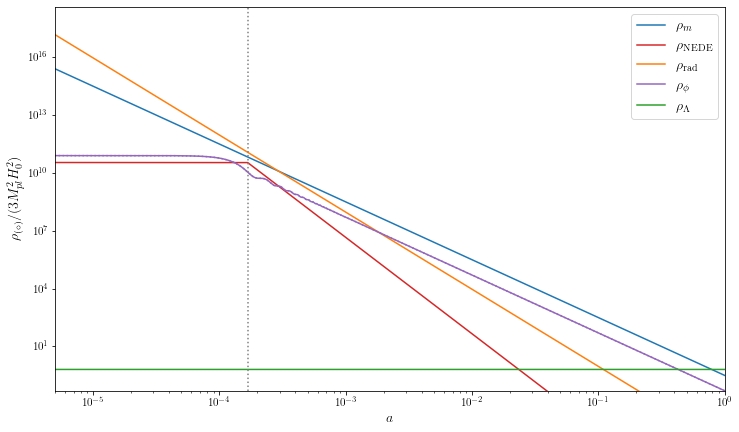

In [9]:
fs=14
rho_rad=np.zeros(a_NEDE.size)
rho_EDE=NEDE_bg['(.)rho_NEDE']



decay_pos=np.argmin(np.abs(NEDE_a_decay-a_NEDE))
#rho_rad[decay_pos:]=rho_EDE[decay_pos:]
rho_rad=rho_rad+NEDE_bg['(.)rho_g']+NEDE_bg['(.)rho_ur']


plt.rcParams['figure.figsize'] = [12, 24]
ax1 = plt.subplot(311)
plt.loglog(a_NEDE, (NEDE_bg['(.)rho_cdm']+NEDE_bg['(.)rho_b'])/H0_NEDE**2,label=r'$\rho_m$',c=color_sequence[0])
plt.loglog(a_NEDE, rho_EDE/H0_NEDE**2,label=r'$\rho_{\rm NEDE}$',c=color_sequence[3])       
plt.loglog(a_NEDE, rho_rad/H0_NEDE**2,label=r'$\rho_{\rm rad}$',c=color_sequence[1])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_trigger']/H0_NEDE**2,label=r'$\rho_{\phi}$',c=color_sequence[4])
plt.loglog(a_NEDE2, NEDE2_bg['(.)rho_trigger']/H0_NEDE**2,ls=':',c=color_sequence[4])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_lambda']/H0_NEDE**2,label=r'$\rho_{\Lambda}$',c=color_sequence[2])
#plt.loglog(a_EDE2, EDE2_bg['(.)rho_lambda']/H0_EDE2**2,ls=':',c=color_sequence[2])
plt.axvline(x=NEDE_a_decay,ls=':',c='gray')
plt.xlim((0.000005,1))


plt.ylim((0.05,0.4e19))


plt.xlabel(r'$a$',fontsize=fs)
ax1.set_ylabel(r'$\rho_{(\circ)} / (3M_{pl}^2 H_0^2)$', fontsize=fs)
plt.legend(fontsize=14)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.savefig('fld_bg.pdf',bbox_inches='tight')
plt.show()
plt.close('all')





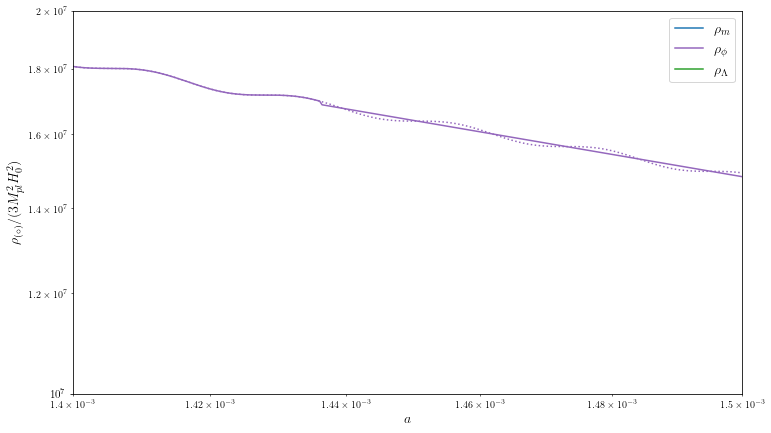

In [10]:
fs=14
rho_rad=np.zeros(a_NEDE.size)
rho_EDE=NEDE_bg['(.)rho_NEDE']



decay_pos=np.argmin(np.abs(NEDE_a_decay-a_NEDE))
#rho_rad[decay_pos:]=rho_EDE[decay_pos:]
rho_rad=rho_rad+NEDE_bg['(.)rho_g']+NEDE_bg['(.)rho_ur']


plt.rcParams['figure.figsize'] = [12, 24]
ax1 = plt.subplot(311)
plt.loglog(a_NEDE, (NEDE_bg['(.)rho_cdm']+NEDE_bg['(.)rho_b'])/H0_NEDE**2,label=r'$\rho_m$',c=color_sequence[0])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_trigger']/H0_NEDE**2,label=r'$\rho_{\phi}$',c=color_sequence[4])
plt.loglog(a_NEDE2, NEDE2_bg['(.)rho_trigger']/H0_NEDE**2,ls=':',c=color_sequence[4])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_lambda']/H0_NEDE**2,label=r'$\rho_{\Lambda}$',c=color_sequence[2])
#plt.loglog(a_EDE2, EDE2_bg['(.)rho_lambda']/H0_EDE2**2,ls=':',c=color_sequence[2])
plt.axvline(x=NEDE_a_decay,ls=':',c='gray')
plt.xlim((0.0014,0.0015))


plt.ylim((1.e7,2e7))

plt.xlabel(r'$a$',fontsize=fs)
ax1.set_ylabel(r'$\rho_{(\circ)} / (3M_{pl}^2 H_0^2)$', fontsize=fs)
plt.legend(fontsize=14)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.savefig('fld_bg.pdf',bbox_inches='tight')
plt.show()
plt.close('all')






NameError: name 'EDE_bg' is not defined

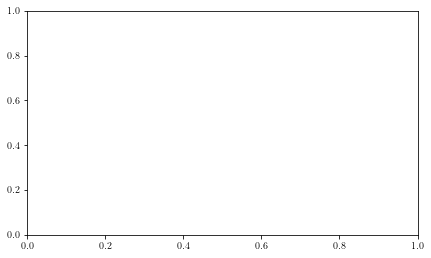

In [15]:
plt.rcParams['figure.figsize'] = [7, 14]
ax1 = plt.subplot(311)

print((EDE_bg['(.)rho_lambda'][1]-EDE2_bg['(.)rho_lambda'][1])/EDE_bg['(.)rho_lambda'][1])

H_diff= (-np.interp(a_EDE,a_EDE2,H_EDE2)+H_EDE)/H_EDE
#plt.loglog(a_EDE,H_EDE)
#plt.loglog(a_EDE2,H_EDE2,ls=':')
#plt.semilogx(a_EDE,H_diff)

rhotot=EDE_bg['(.)rho_lambda']+EDE_bg['(.)rho_cdm']+EDE_bg['(.)rho_b']+rho_rad+EDE_bg['(.)rho_NEDE']

constr=(H_EDE**2/H0_EDE**2-rhotot/H0_EDE**2)

#ax1.loglog(a_EDE,H_EDE**2/H0_EDE**2)
ax1.semilogx(a_EDE,constr)
ax1.set_xlim(0.01,1)
ax1.set_ylim(0,0.01)



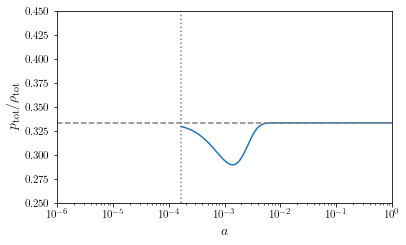

In [7]:
#w[a_] = Hfunc'[1/a - 1]/Hfunc[1/a - 1] (1/a) 2/3 - 1

def Hfun(a):
    return np.interp(a,a_EDE,H_EDE)

def HfunPrime(a):
    return np.interp(a,a_EDE[:-1],np.diff(H_EDE)/np.diff(a_EDE))

eos=-2./3.*HfunPrime(a_EDE)*a_EDE/H_EDE-1

eos2=EDE_bg['(.)w_NEDE']

ax1 = plt.subplot(311)
plt.rcParams['figure.figsize'] = [6, 12]
plt.semilogx(a_EDE[:decay_pos-5], eos2[:decay_pos-5],c=color_sequence[0])
plt.semilogx(a_EDE[decay_pos+5:], eos2[decay_pos+5:],c=color_sequence[0])
plt.axvline(x=EDE_a_decay,ls=':',c='gray')
plt.axhline(1./3,ls='--',c='gray')
plt.axhline(0,ls='-',c='gray')
plt.xlim((0.000001,1))
plt.ylim((1./4.,.45))

plt.xlabel(r'$a$',fontsize=fs)
plt.ylabel(r'$p_{\rm tot} / \rho_{\rm tot}$', fontsize=fs)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)

plt.savefig('eos_bg.pdf',bbox_inches='tight')

plt.show()
plt.close()

In [19]:
NEDE_bg.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_NEDE', '(.)w_NEDE', '(.)rho_trigger', '(.)p_trigger', '(.)p_prime_trigger', 'phi_trigger', "phi'_trigger", '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

<Figure size 2160x3600 with 0 Axes>

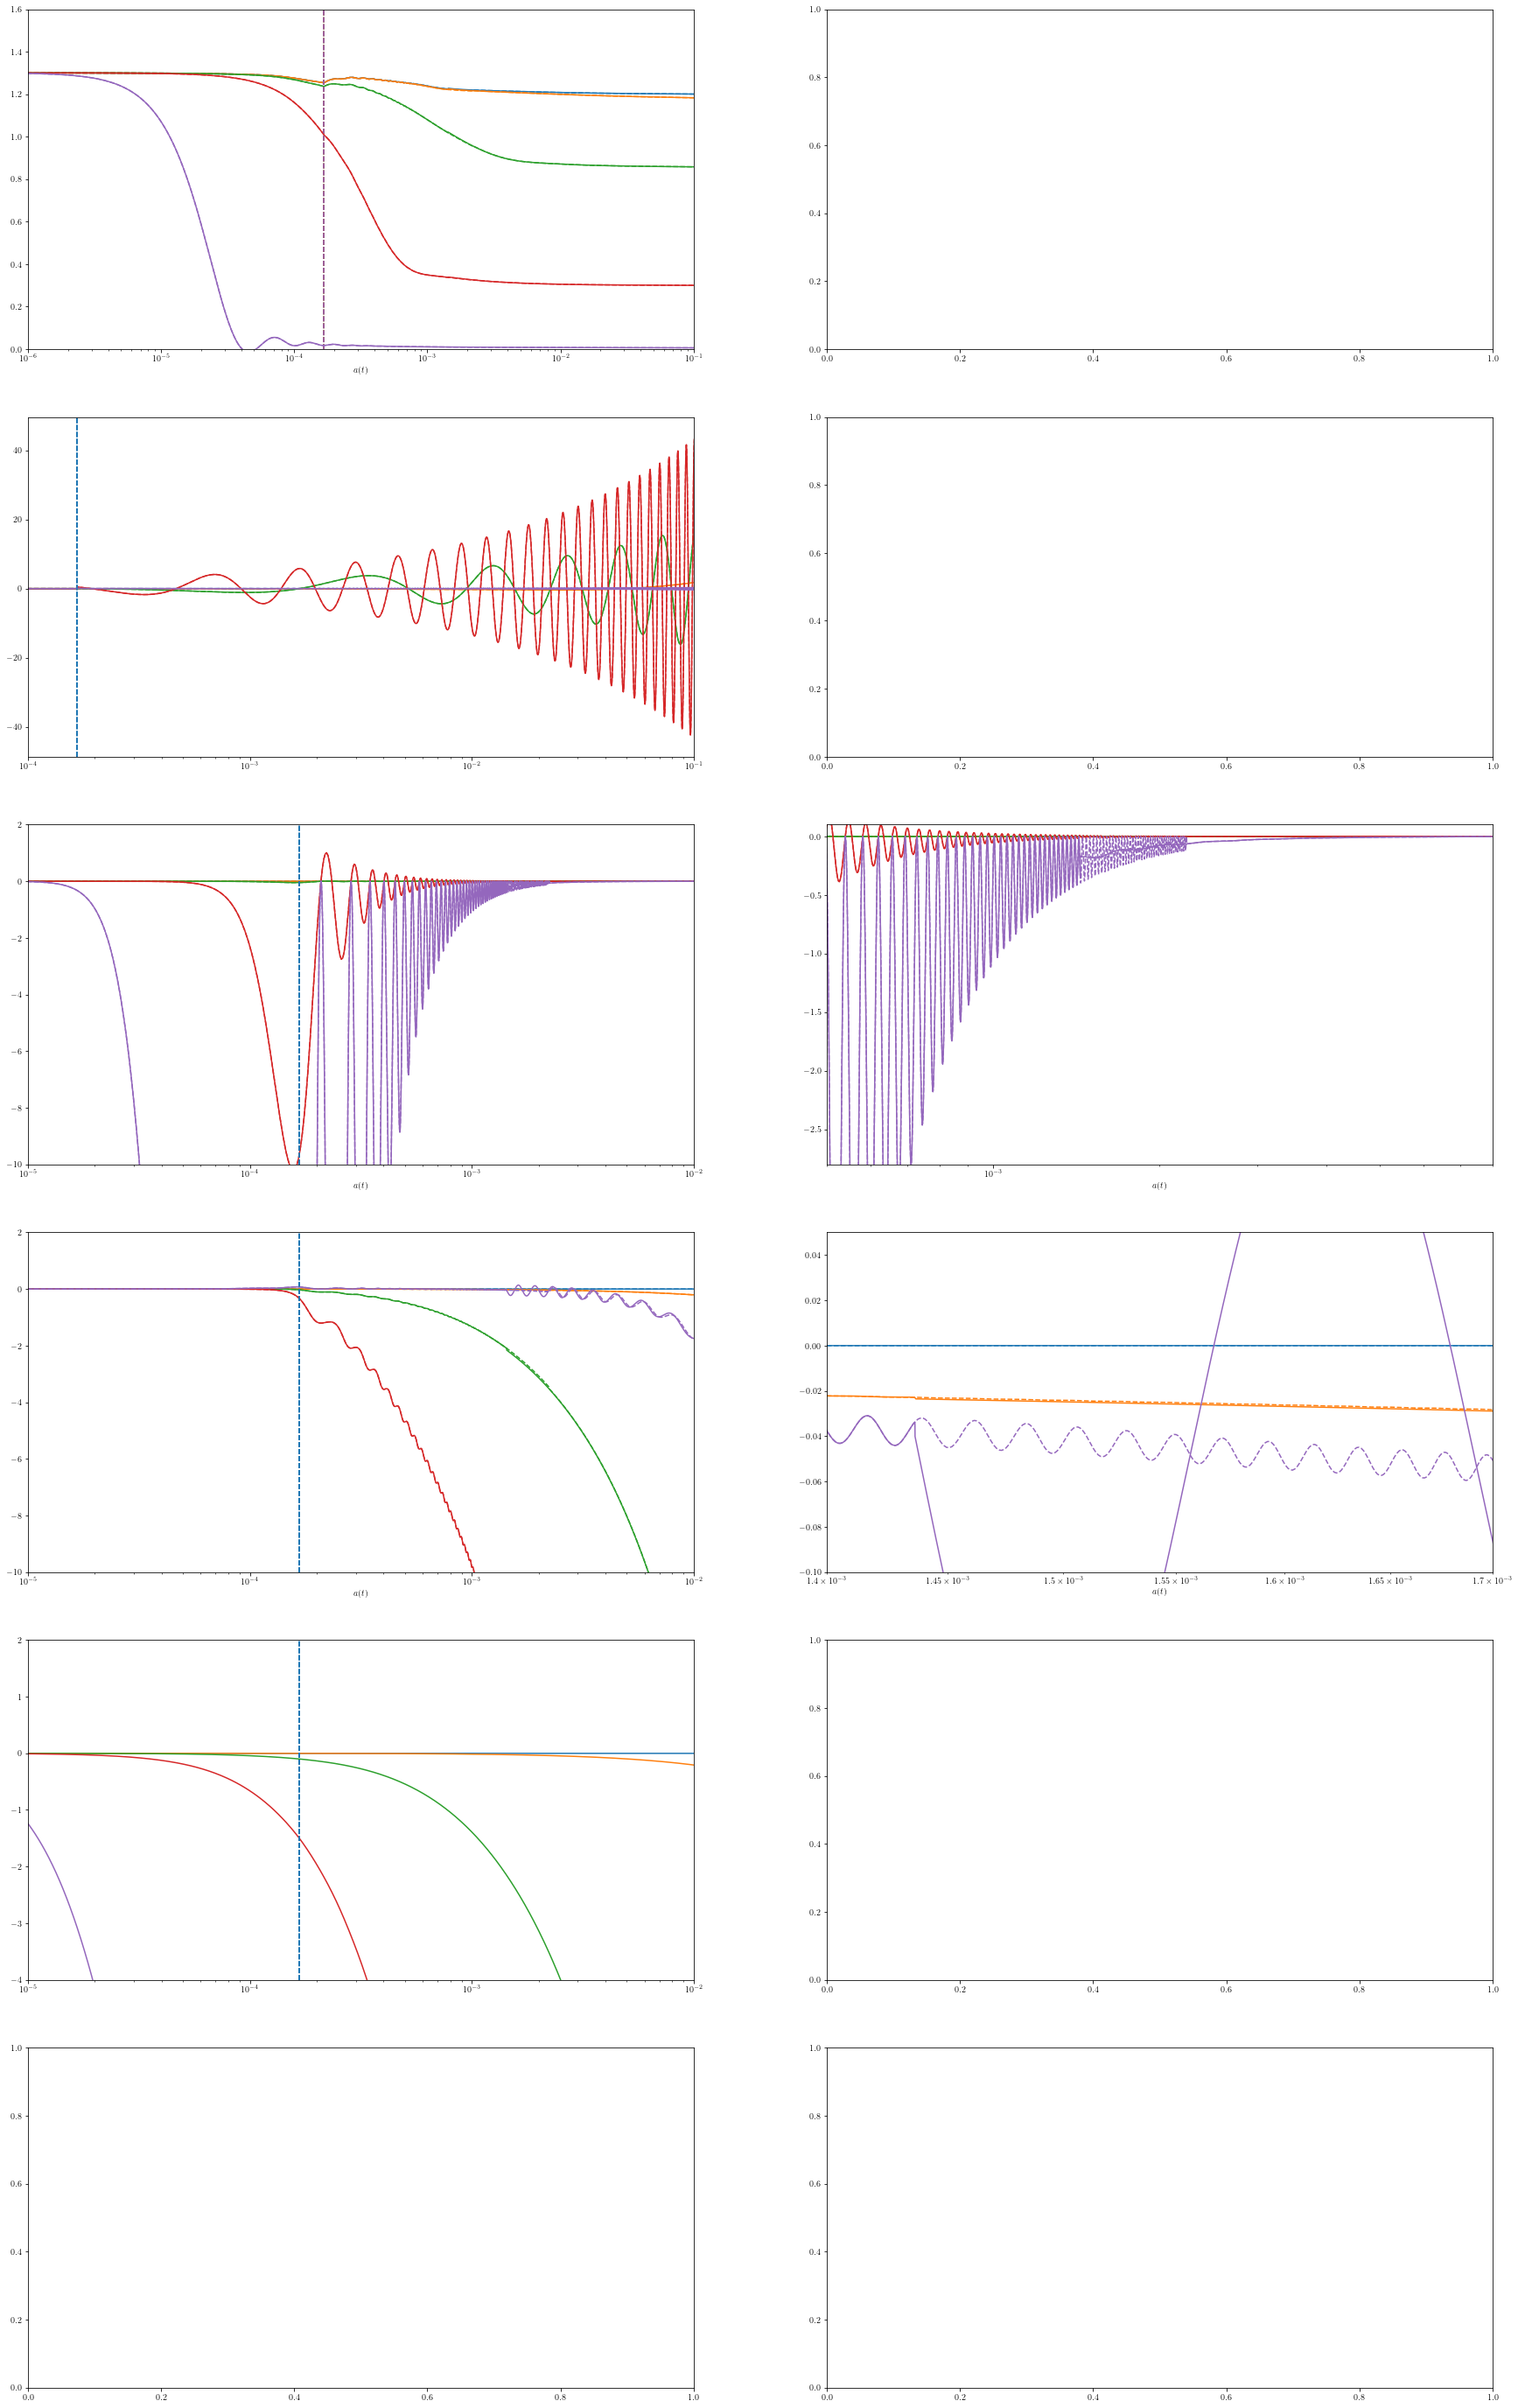

In [11]:
NEDE_sarray = NEDE_pert['scalar']
NEDE2_sarray = NEDE_pert2['scalar']
#LCDM_sarray = LCDM_pert['scalar']


plt.rcParams['figure.figsize'] = [30, 50]
plt.subplots_adjust(hspace=0.1)

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6, 2)
#fig, ((ax1, ax2)) = plt.subplots(1, 2)

for i in range(5):
    NEDE_sdict = NEDE_sarray[i]
    NEDE_a = NEDE_sdict['a']
    NEDE2_sdict = NEDE2_sarray[i]
    NEDE2_a = NEDE2_sdict['a']
    
    #LCDM_sdict = LCDM_sarray[i]
    #LCDM_a = LCDM_sdict['a']
    

    NEDE_perturb = NEDE_sdict['psi']+NEDE_sdict['phi']
    NEDE2_perturb = NEDE2_sdict['psi']+NEDE2_sdict['phi']
    ax1.semilogx(NEDE_a,NEDE_perturb,color=color_sequence[i])
    ax1.semilogx(NEDE2_a,NEDE2_perturb,color=color_sequence[i],ls='--')
    ax1.axvline(x=NEDE_a_decay,ls='--',color=color_sequence[i])
    ax1.axvline(x=NEDE_a_rec,ls=':')
    ax1.set_xlim((0.0000010,0.1))
    #ax1.set_xlim((0.00075,0.0008))
    ax1.set_xlabel(r"$a(t)$")
    ax1.set_ylim((0,1.6))
    #ax1.set_ylim((1.2,1.29))


    #diff_Weyl=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    
    #ax2.semilogx(EDE_a,diff_Weyl)
    #ax2.axvline(x=EDE_a_decay,ls='--',color=color_sequence[i])
    #ax2.axvline(x=EDE_a_rec,ls=':')
    #ax2.set_xlim((0.000010,0.1))
    #ax2.set_xlim((0.00075,0.0008))
   # ax2.set_xlabel(r"$a(t)$")
    #ax2.set_ylim((-0.05,0.05))

    
    EDE_perturb = NEDE_sdict['delta_NEDE']
    EDE2_perturb = NEDE2_sdict['delta_NEDE']
    ax3.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax3.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax3.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax3.axvline(x=NEDE_a_rec,ls=':')
    ax3.set_xlim((0.0001,0.1))
    
    #ax3.set_xlim((0.00075,0.0008))
    #ax3.set_xlabel(r"$a(t)$")
    #ax3.set_ylim((-15,15))
    #ax3.set_ylim((-.03,.03))
    #plt.rcParams['figure.figsize'] = [20, 10]
    
    #diff_NEDE_delta=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    
    #EDE_perturb = EDE_sdict['theta_NEDE']
    #ax4.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax4.semilogx(EDE_a,diff_NEDE_delta,color=color_sequence[i])
    #ax4.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax4.axvline(x=EDE_a_rec,ls=':')
    #ax4.set_xlim((0.0001,0.1))
    #ax4.set_xlim((0.00010,0.1))
    #ax4.set_xlabel(r"$a(t)$")
    #ax4.set_ylim((-1,.1))
    #ax4.set_ylim((-.000002,.000002))
    #plt.rcParams['figure.figsize'] = [20, 10]
    

    #EDE_perturb = EDE_sdict['delta_g']
    #EDE2_perturb = EDE2_sdict['delta_g']
    #ax5.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax5.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax5.set_xlim((0.0001,0.1))
    #ax5.set_xlim((0.00075,0.0008))
    #ax5.set_xlabel(r"$a(t)$")
    #ax5.set_ylim((-2.5,2.5))
    
    #EDE_perturb=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    #EDE_perturb = EDE_sdict['theta_g']
    #ax6.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax6.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax6.set_xlim((0.0001,0.1))
    #ax6.set_xlim((0.00075,0.0008))
    #ax6.set_xlabel(r"$a(t)$")
    #ax6.set_ylim((-.0000005,.0000005))

    EDE_perturb = NEDE_sdict['theta_hat_trigger']
    EDE2_perturb = NEDE2_sdict['theta_hat_trigger']
    ax5.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax5.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax5.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax5.set_xlim((0.00001,0.01))
    #ax7.set_xlim((0.00075,0.0008))
    ax5.set_xlabel(r"$a(t)$")
    ax5.set_ylim((-10,2))

    EDE_perturb = NEDE_sdict['theta_hat_trigger']
    EDE2_perturb = NEDE2_sdict['theta_hat_trigger']
    ax6.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax6.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax6.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax6.set_xlim((0.0005,0.008))
    #ax6.set_xlim((0.00075,0.0008))
    ax6.set_xlabel(r"$a(t)$")
    ax6.set_ylim((-2.8,0.1))


    
    EDE_perturb = NEDE_sdict['delta_trigger']
    EDE2_perturb = NEDE2_sdict['delta_trigger']
    ax7.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax7.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax7.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax7.set_xlim((0.00001,0.01))
    #ax7.set_xlim((0.00075,0.0008))
    ax7.set_xlabel(r"$a(t)$")
    ax7.set_ylim((-10,2))

    EDE_perturb = NEDE_sdict['delta_trigger']
    EDE2_perturb = NEDE2_sdict['delta_trigger']
    ax8.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax8.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax8.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax8.set_xlim((0.0014,0.0017))
    #ax7.set_xlim((0.00075,0.0008))
    ax8.set_xlabel(r"$a(t)$")
    ax8.set_ylim((-0.1,0.05))
    

    EDE_perturb = NEDE_sdict['delta_cdm']
    ax9.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax9.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax9.set_xlim((0.00001,0.01))
    ax9.set_ylim((-4,2))
    #ax9.set_xlabel(r"$a(t)$")
    #ax9.set_ylim((-5,2.5))
   
    
    #EDE_perturb = EDE_sdict['theta_b']
    #ax10.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax10.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax10.set_xlim((0.0001,0.1))
    #ax10.set_xlim((0.00075,0.0008))
    #ax10.set_xlabel(r"$a(t)$")
    #ax10.set_ylim((-2.5,2.5))
    #ax10.set_ylim((-.0000005,.0000005))
    
    #EDE_perturb = EDE_sdict['phi']
    #EDE_perturb = EDE_sdict['theta_NEDE']
    #EDE2_perturb = EDE2_sdict['theta_NEDE']
    #ax11.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax11.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax11.set_xlim((0.0001,0.1))
    #ax11.set_xlim((0.00075,0.0008))
    #ax11.set_xlabel(r"$a(t)$")
    #ax11.set_ylim((-2.5,2.5))
    #ax11.set_ylim((.64,.646))
    
    #EDE_perturb = EDE_sdict['psi']
    #LCDM_perturb = LCDM_sdict['psi']
    #EDE_perturb=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    #ax12.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax12.semilogx(LCDM_a,LCDM_perturb,color=color_sequence[i])
    #ax12.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax12.set_xlim((0.0001,0.001))
    #ax12.set_xlim((0.00075,0.0008))
    #ax12.set_xlabel(r"$a(t)$")
    #ax12.set_ylim((-.000006,.0000061))
    



In [21]:
cl_obs_tt=np.loadtxt('./data/COM_PowerSpect_CMB-TT-binned_R3.01.txt')
cl_obs_ee=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-EE-binned_R3.02.txt')
cl_obs_te=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TE-binned_R3.02.txt')
cl_obs_tt_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TT-full_R3.01.txt')
cl_obs_ee_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-EE-full_R3.01.txt')
cl_obs_te_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TE-full_R3.01.txt')


lmin=2
l = np.array(range(lmin,2501))
#diff = np.array(range(lmin,2501))
#diff2 = np.array(range(lmin,2501))
factor = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2
factorE = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2
cl = LCDM.lensed_cl(2500)

pert = LCDM.get_perturbations()

cl_EDE = EDE.lensed_cl(2500)
cl_DR = DR.lensed_cl(2500)
cl_ADE_tt = np.load('./ADE/cl_ADE_tt.npy')
cl_ADE_te = np.load('./ADE/cl_ADE_te.npy')
cl_ADE_ee = np.load('./ADE/cl_ADE_ee.npy')
cl_OEDE_tt = np.load('./OEDE/cl_OEDE_tt.npy')
cl_OEDE_te = np.load('./OEDE/cl_OEDE_te.npy')
cl_OEDE_ee = np.load('./OEDE/cl_OEDE_ee.npy')
print(cl_ADE_tt.shape)

diff = -(cl['tt'][lmin:]-cl_EDE['tt'][lmin:])/cl['tt'][lmin:]
diff2 = -(cl['tt'][lmin:]-cl_DR['tt'][lmin:])/cl['tt'][lmin:]
diff_ADE = -(cl['tt'][lmin:]-cl_ADE_tt[lmin:])/cl['tt'][lmin:]
diff_OEDE = -(cl['tt'][lmin:]-cl_OEDE_tt[lmin:])/cl['tt'][lmin:]

diff_ee = -(cl['ee'][lmin:]-cl_EDE['ee'][lmin:])/cl['ee'][lmin:]
diff2_ee = -(cl['ee'][lmin:]-cl_DR['ee'][lmin:])/cl['ee'][lmin:]
diff_ADE_ee = -(cl['ee'][lmin:]-cl_ADE_ee[lmin:])/cl['ee'][lmin:]
diff_OEDE_ee = -(cl['ee'][lmin:]-cl_OEDE_ee[lmin:])/cl['ee'][lmin:]

diff_te = -(cl['te'][lmin:]-cl_EDE['te'][lmin:])/np.sqrt(cl['tt'][lmin:]*cl['ee'][lmin:]+cl['te'][lmin:]**2)
diff2_te = -(cl['te'][lmin:]-cl_DR['te'][lmin:])/np.sqrt(cl['tt'][lmin:]*cl['ee'][lmin:]+cl['te'][lmin:]**2)
diff_ADE_te = -(cl['te'][lmin:]-cl_ADE_te[lmin:])/np.sqrt(cl['tt'][lmin:]*cl['ee'][lmin:]+cl['te'][lmin:]**2)
diff_OEDE_te = -(cl['te'][lmin:]-cl_OEDE_te[lmin:])/np.sqrt(cl['tt'][lmin:]*cl['ee'][lmin:]+cl['te'][lmin:]**2)

cl_LCDM_tt=np.interp(cl_obs_tt[:,0],l,factor*cl['tt'][lmin:])
resid = -(cl_LCDM_tt-cl_obs_tt[:,1])/cl_LCDM_tt
resid_err = np.transpose(cl_obs_tt[:,2:4])
resid_err[0,:]=resid_err[0,:]/cl_LCDM_tt
resid_err[1,:]=resid_err[1,:]/cl_LCDM_tt

l2max=28
cl_LCDM2_tt=np.interp(cl_obs_tt_full[:l2max,0],l,factor*cl['tt'][lmin:])
resid2 = -(cl_LCDM2_tt-cl_obs_tt_full[:l2max,1])/cl_LCDM2_tt
resid2_err = np.transpose(cl_obs_tt_full[:l2max,2:4])
resid2_err[0,:]=resid2_err[0,:]/cl_LCDM2_tt
resid2_err[1,:]=resid2_err[1,:]/cl_LCDM2_tt


cl_LCDM_ee=np.interp(cl_obs_ee[:,0],l,factor*cl['ee'][lmin:])
resid_ee = -(cl_LCDM_ee-cl_obs_ee[:,1])/cl_LCDM_ee
resid_ee_err = np.transpose(cl_obs_ee[:,2:4])
resid_ee_err[0,:]=resid_ee_err[0,:]/cl_LCDM_ee
resid_ee_err[1,:]=resid_ee_err[1,:]/cl_LCDM_ee


cl_LCDM2_ee=np.interp(cl_obs_ee_full[:l2max,0],l,factor*cl['ee'][lmin:])
resid2_ee = -(cl_LCDM2_ee-cl_obs_ee_full[:l2max,1])/cl_LCDM2_ee
resid2_ee_err = np.transpose(cl_obs_ee_full[:l2max,2:4])
resid2_ee_err[0,:]=resid2_ee_err[0,:]/cl_LCDM2_ee
resid2_ee_err[1,:]=resid2_ee_err[1,:]/cl_LCDM2_ee



cl_LCDM_te=np.interp(cl_obs_te[:,0],l,factor*cl['te'][lmin:])
cl_LCDM_tt_temp=np.interp(cl_obs_te[:,0],l,factor*cl['tt'][lmin:])
cl_LCDM_ee_temp=np.interp(cl_obs_te[:,0],l,factor*cl['ee'][lmin:])

resid_te = -(cl_LCDM_te-cl_obs_te[:,1])/np.sqrt(cl_LCDM_te**2+cl_LCDM_tt_temp*cl_LCDM_ee_temp)
resid_te_err = np.transpose(cl_obs_te[:,2:4])
resid_te_err[0,:]=resid_te_err[0,:]/np.sqrt(cl_LCDM_te**2+cl_LCDM_tt_temp*cl_LCDM_ee_temp)
resid_te_err[1,:]=resid_te_err[1,:]/np.sqrt(cl_LCDM_te**2+cl_LCDM_tt_temp*cl_LCDM_ee_temp)


cl_LCDM2_te=np.interp(cl_obs_te_full[:l2max,0],l,factor*cl['te'][lmin:])
cl_LCDM2_tt_temp=np.interp(cl_obs_te_full[:l2max,0],l,factor*cl['tt'][lmin:])
cl_LCDM2_ee_temp=np.interp(cl_obs_te_full[:l2max,0],l,factor*cl['ee'][lmin:])

resid2_te = -(cl_LCDM2_te-cl_obs_te_full[:l2max,1])/np.sqrt(cl_LCDM2_te**2+cl_LCDM2_tt_temp*cl_LCDM2_ee_temp)
resid2_te_err = np.transpose(cl_obs_te_full[:l2max,2:4])
resid2_te_err[0,:]=resid2_te_err[0,:]/np.sqrt(cl_LCDM2_te**2+cl_LCDM2_tt_temp*cl_LCDM2_ee_temp)
resid2_te_err[1,:]=resid2_te_err[1,:]/np.sqrt(cl_LCDM2_te**2+cl_LCDM2_tt_temp*cl_LCDM2_ee_temp)



print(cl_obs_ee[:l2max,1])
print(cl['ee'][lmin+28:]*factor[28:])



OSError: ./data/COM_PowerSpect_CMB-TT-binned_R3.01.txt not found.

NameError: name 'cl_obs_tt_full' is not defined

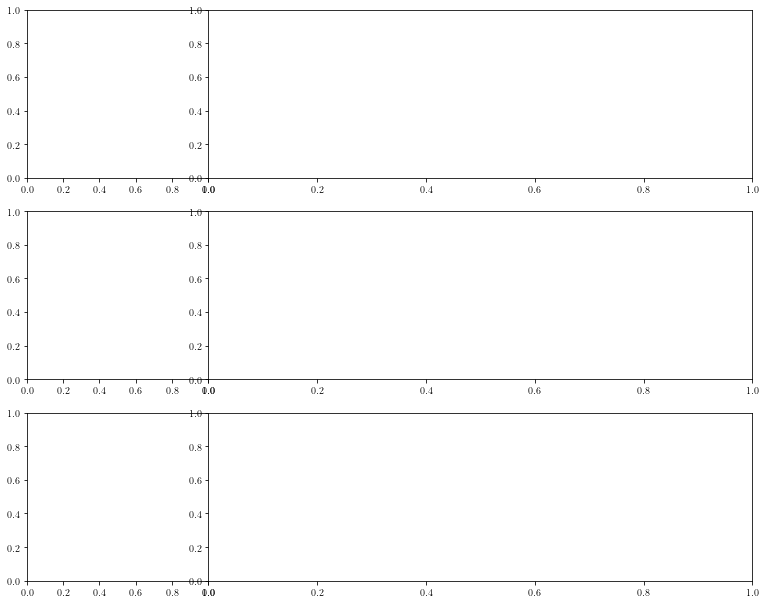

In [22]:
ms=2

fs=14

plt.rcParams['figure.figsize'] = [13, 10.5]
fig, axs = plt.subplots(nrows=3, ncols=2,gridspec_kw={'width_ratios': [1, 3]})

fig.subplots_adjust(wspace=0)
ax1 = axs[0,0]
ax1.errorbar(cl_obs_tt_full[:l2max,0], resid2,yerr=resid2_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax1.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax1.plot(l[:30], diff[:30],c=color_sequence[3])
ax1.plot(l[:30], diff2[:30],c=color_sequence[0],ls=':')
ax1.plot(l[:30], diff_ADE[:30],c=cADE,ls='--')
ax1.plot(l[:30], diff_OEDE[:30],c=cOEDE,ls='dashdot')

ax1.set_ylim(-0.5,0.5)
ax1.set_xlim(1,30)
ax1.tick_params(labelbottom=False) 


ax2 = axs[0,1]
ax2.yaxis.tick_right()
ax2.errorbar(cl_obs_tt[:,0], resid,yerr=resid_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax2.plot(l,np.zeros(l.shape) ,c='black',ls='-',label=r'$\Lambda$CDM')
ax2.plot(l, diff,c=color_sequence[3],label=r'NEDE')
ax2.plot(l, diff2,c=color_sequence[0],ls=':',label=r'DR')
ax2.plot(l, diff_ADE,c=cADE,ls='--',label=r'cADE')
ax2.plot(l, diff_OEDE,c=cOEDE,ls='dashdot',label=r'EDE')

ax2.tick_params(labelbottom=False) 
ax2.set_ylim(-0.023,0.023)
ax2.set_xlim(30,2500)

ax3 = axs[1,0]
ax3.errorbar(cl_obs_tt_full[:l2max,0], resid2_ee,yerr=resid2_ee_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax3.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax3.plot(l[:30], diff_ee[:30],c=color_sequence[3])
ax3.plot(l[:30], diff2_ee[:30],c=color_sequence[0],ls=':')
ax3.plot(l[:30], diff_ADE_ee[:30],c=cADE,ls='--')
ax3.plot(l[:30], diff_OEDE_ee[:30],c=cOEDE,ls='dashdot')

ax3.set_ylim(-3.,3.)
ax3.set_xlim(1,30)
ax3.tick_params(labelbottom=False) 

ax4 = axs[1,1]
ax4.yaxis.tick_right()
ax4.errorbar(cl_obs_ee[:,0], resid_ee,yerr=resid_ee_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax4.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax4.plot(l, diff_ee,c=color_sequence[3])
ax4.plot(l, diff2_ee,c=color_sequence[0],ls=':')
ax4.plot(l, diff_ADE_ee,c=cADE,ls='--')
ax4.plot(l, diff_OEDE_ee,c=cOEDE,ls='dashdot')

ax4.set_ylim(-0.06,0.06)
ax4.set_xlim(30,2500)
ax4.tick_params(labelbottom=False) 

ax5 = axs[2,0]
ax5.errorbar(cl_obs_tt_full[:l2max,0], resid2_te,yerr=resid2_te_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax5.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax5.plot(l[:30], diff_te[:30],c=color_sequence[3])
ax5.plot(l[:30], diff2_te[:30],c=color_sequence[0],ls=':')
ax5.plot(l[:30], diff_ADE_te[:30],c=cADE,ls='--')
ax5.plot(l[:30], diff_OEDE_te[:30],c=cOEDE,ls='dashdot')

ax5.set_ylim(-.5,.5)
ax5.set_xlim(1,30)


ax6 = axs[2,1]
ax6.yaxis.tick_right()
ax6.errorbar(cl_obs_te[:,0], resid_te,yerr=resid_te_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax6.plot(l,np.zeros(l.shape) ,c='black',ls='-',label=r'$\Lambda$CDM')
ax6.plot(l, diff_te,c=color_sequence[3],label=r'New EDE')
ax6.plot(l, diff2_te,c=color_sequence[0],ls=':')
ax6.plot(l, diff_ADE_te,c=cADE,ls='--')
ax6.plot(l, diff_OEDE_te,c=cOEDE,ls='dashdot')

ax6.set_ylim(-0.03,0.03)
ax6.set_xlim(30,2500)


plt.setp(ax1.get_yticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), fontsize=10)
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_xticklabels(), fontsize=10)

ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
ax4.locator_params(axis='y', nbins=5)
ax5.locator_params(axis='y', nbins=5)
ax6.locator_params(axis='y', nbins=5)


ax2.legend(fontsize=12, ncol=6,bbox_to_anchor=(0.75, 1.1))

ax6.set_xlabel(r'$\ell$',fontsize=fs)
ax1.set_ylabel(r'$\Delta C^{TT}_\ell / C^{TT}_\ell$', fontsize=fs)
ax3.set_ylabel(r'$\Delta C^{EE}_\ell / C^{EE}_\ell$', fontsize=fs)
ax5.set_ylabel(r'$\Delta C^{TE}_\ell  / \sqrt{C^{TT}_\ell C^{EE}_\ell + (C^{TE}_\ell)^2}$', fontsize=fs)


#mode that entered sound horizon at time of decay:

l_enter_rs=(l_k(1/rs_z(EDE_z_decay,EDE_bg)[1]))
ax2.axvline(x=l_enter_rs,ls='--',c=cNEDE)
ax4.axvline(x=l_enter_rs,ls='--',c=cNEDE)
ax6.axvline(x=l_enter_rs,ls='--',c=cNEDE)

#mode that entered particle horizon at time of decay:
l_enter_ph=(l_z(EDE_z_decay))
ax2.axvline(x=l_enter_ph,ls=':',c=cNEDE)
ax4.axvline(x=l_enter_ph,ls=':',c=cNEDE)
ax6.axvline(x=l_enter_ph,ls=':',c=cNEDE)

plt.savefig('residuals.pdf',bbox_inches='tight')

plt.show()

# make these tick labels invisible
#ax2.setp(ax2.get_xticklabels(), visible=False)

In [10]:
mode=0
mode2=1


kstr='0.01,0.04'
klist=kstr.split(',')

# WE USE DIFFERENT PHI_INI HERE

EDE_clock_ini_2=0.0001

bg_step=1.e-3




EDEbase = Class()
#EDEbase.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2*0.00000000001 ,'EDE2_clock_mass' : (10**EDE_params[6]),'EDE2_clock_ini':0.000001,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1],'h':LCDM_params[2],'ln10^{10}A_s':LCDM_params[3],'n_s':LCDM_params[4],'tau_reio':LCDM_params[5]})
EDEbase.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,
             'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],
             'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2*1.0 ,
             'EDE2_clock_mass' : (10**EDE_params[6]),'EDE2_clock_ini':EDE_clock_ini_2,
             'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,
             'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4',
             'perturbations_verbose':'2','omega_b':EDE_params[0],'omega_cdm':EDE_params[1],'h':EDE_params[2],
             'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7],
             'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})

EDEbase.compute()
EDEbase_derived=EDEbase.get_current_derived_parameters(['z_decay','z_rec','H0','100*theta_s'])
EDEbase_pert = EDEbase.get_perturbations()
EDEbase_sarray = EDEbase_pert['scalar']



EDEbase_z_decay=EDEbase_derived['z_decay']
EDEbase_theta=EDEbase_derived['100*theta_s']
EDEbase_z_rec=EDEbase_derived['z_rec']
EDEbase_a_decay=1/(EDEbase_z_decay+1)
EDEbase_a_rec=1/(EDEbase_z_rec+1)

EDEbase_bg = EDEbase.get_background()
pos_mode=np.argmin(np.abs(EDEbase_bg['comov.snd.hrz.']-1/float(klist[mode])))
EDEbase_a_mode1=1/(EDEbase_bg['z']+1)[pos_mode]
pos_mode2=np.argmin(np.abs(EDEbase_bg['comov.snd.hrz.']-1/float(klist[mode2])))
EDEbase_a_mode2=1/(EDEbase_bg['z']+1)[pos_mode2]

EDEbaseDstar=EDEbase.angular_distance(EDEbase_z_rec)*(EDEbase_z_rec+1)
#EDEbase.struct_cleanup()
print("base: ")
print("z_decay:"+str(EDEbase_z_decay))
print("theta:"+str(EDEbase_theta))



print(frac_EDE)



base: 
z_decay:4959.72827238
theta:1.04131460851
0.1296225


In [11]:
#relative change in f_EDE:

rel_f_EDE=0.1


EDE3 = Class()
EDE3.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,
          'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,
          'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],
          'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2 * (1+rel_f_EDE),'EDE2_clock_mass' : (10**EDE_params[6])*1.0083,
          'EDE2_clock_ini':EDE_clock_ini_2,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,
          'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2',
          'omega_b':EDE_params[0],'omega_cdm':EDE_params[1],'h':EDE_params[2]*1.013,'ln10^{10}A_s':EDE_params[3],
          'n_s':EDE_params[4],'tau_reio':EDE_params[7],
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
#EDE3.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2 ,'EDE2_clock_mass' : (10**EDE_params[6])*1.0894,'EDE2_clock_ini':0.000001,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1],'h':LCDM_params[2]*1.134,'ln10^{10}A_s':LCDM_params[3],'n_s':LCDM_params[4],'tau_reio':LCDM_params[5]})

EDE3.compute()
EDE3_pert = EDE3.get_perturbations()
EDE3_sarray = EDE3_pert['scalar']

EDE3_derived=EDE3.get_current_derived_parameters(['z_decay','z_rec','H0','100*theta_s'])
EDE3_z_decay=EDE3_derived['z_decay']
#EDE3.struct_cleanup()
print("EDE3: ")
print("z_decay:"+str(EDE3_z_decay))
print("theta:"+str(EDE3_derived['100*theta_s']))

EDE3: 
z_decay:4959.70779157
theta:1.04132893408


In [12]:
#relative change in w_cdm:

rel_w_cdm= (EDE_params[1]-LCDM_params[1])/(frac_EDE*EDE_params[1])*frac_EDE*rel_f_EDE
rel_H=-0.0075
rel_m=0.0006
        
EDE4 = Class()
EDE4.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,'sub_dom_cond':0.000001,
          'back_integration_stepsize':5.e-3,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,
          'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2,
          'EDE2_clock_mass' : (10**EDE_params[6])*(1+rel_m),'EDE2_clock_ini':EDE_clock_ini_2,'Bubble_trigger_H_over_m':EDE_params[8],
          'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,
          'background_verbose':'4','perturbations_verbose':'2','omega_b':EDE_params[0],'omega_cdm':EDE_params[1]*(1+rel_w_cdm),
          'h':EDE_params[2]*(1+rel_H),'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7],
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
#EDE4.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2,'EDE2_clock_mass' : (10**EDE_params[6])*1.000,'EDE2_clock_ini':0.000001,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':EDE_params[0],'omega_cdm':EDE_params[1]*1.008,'h':EDE_params[2]*.993,'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7]})
#EDE4.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2*0.00000000001 ,'EDE2_clock_mass' : (10**EDE_params[6]),'EDE2_clock_ini':0.000001,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1]*1.05,'h':LCDM_params[2]*0.97,'ln10^{10}A_s':LCDM_params[3],'n_s':LCDM_params[4],'tau_reio':LCDM_params[5]})

EDE4.compute()
EDE4_pert = EDE4.get_perturbations()
EDE4_sarray = EDE4_pert['scalar']
#EDE4.struct_cleanup()

EDE4_derived=EDE4.get_current_derived_parameters(['z_decay','z_rec','H0','100*theta_s'])
EDE4_z_decay=EDE4_derived['z_decay']
#EDE3.struct_cleanup()
print("EDE4: ")
print("z_decay:"+str(EDE4_z_decay))
print("theta:"+str(EDE4_derived['100*theta_s']))
print("rel_w_cdm:"+str(rel_w_cdm))      
    
    
    

EDE4: 
z_decay:4959.88414295
theta:1.0413163367
rel_w_cdm:0.00938413794477


In [13]:
EDE5 = Class()
EDE5.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,
          'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,
          'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],
          'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2,'EDE2_clock_mass' : (10**EDE_params[6])/1.5,
          'EDE2_clock_ini':EDE_clock_ini_2,'Bubble_trigger_H_over_m':EDE_params[8]*1.5,
          'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,
          'background_verbose':'4','perturbations_verbose':'2','omega_b':EDE_params[0],'omega_cdm':EDE_params[1],
          'h':EDE_params[2],'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7],
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
EDE5.compute()
EDE5_pert = EDE5.get_perturbations()
EDE5_sarray = EDE5_pert['scalar']
#EDE5.struct_cleanup()
print("EDE5: ")

EDE6 = Class()
EDE6.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,
          'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,
          'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10]*1.15,
          'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2,'EDE2_clock_mass' : (10**EDE_params[6]),
          'EDE2_clock_ini':EDE_clock_ini_2,'Bubble_trigger_H_over_m':EDE_params[8],
          'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes',
          'k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':EDE_params[0],
          'omega_cdm':EDE_params[1],'h':EDE_params[2],'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],
          'tau_reio':EDE_params[7],
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
EDE6.compute()
EDE6_pert = EDE6.get_perturbations()
EDE6_sarray = EDE6_pert['scalar']
#EDE6.struct_cleanup()
print("EDE6: ")

EDE5: 
EDE6: 


In [14]:
#relative change in n_s:

rel_ns= (EDE_params[4]-LCDM_params[4])/(frac_EDE*EDE_params[4])*frac_EDE*rel_f_EDE
rel_As= (EDE_params[3]-LCDM_params[3])/(frac_EDE*EDE_params[3])*frac_EDE*rel_f_EDE

EDE7 = Class()
EDE7.set({'tol_perturb_integration':0.00001,'perturb_sampling_stepsize':0.01,'tol_background_integration':0.01,
          'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,
          'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],
          'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2 ,'EDE2_clock_mass' : (10**EDE_params[6]),'EDE2_clock_ini':EDE_clock_ini_2,
          'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl',
          'lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':EDE_params[0],
          'omega_cdm':EDE_params[1],'h':EDE_params[2],'ln10^{10}A_s':EDE_params[3]*(1+rel_As),'n_s':EDE_params[4]*(1+rel_ns),
          'tau_reio':EDE_params[7],
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
EDE7.compute()
EDE7_pert = EDE6.get_perturbations()
EDE7_sarray = EDE6_pert['scalar']
#EDE6.struct_cleanup()
print("EDE7: ")
print("rel_ns:"+str(rel_ns))  
print("rel_As:"+str(rel_As))  


          

EDE7: 
rel_ns:0.00216252776077
rel_As:0.000489184425364


In [15]:
EDEbase_sdict = EDEbase_sarray[mode]
EDEbase_sdict_2 = EDEbase_sarray[mode2]
EDEbase_a = EDEbase_sdict['a']
EDEbase_a_2 = EDEbase_sdict_2['a']

EDE3_sdict = EDE3_sarray[mode]
EDE3_sdict_2 = EDE3_sarray[mode2]
EDE3_a = EDE3_sdict['a']
EDE3_a_2 = EDE3_sdict_2['a']

EDE4_sdict = EDE4_sarray[mode]
EDE4_sdict_2 = EDE4_sarray[mode2]
EDE4_a = EDE4_sdict['a']
EDE4_a_2 = EDE4_sdict_2['a']

EDE5_sdict = EDE5_sarray[mode]
EDE5_sdict_2 = EDE5_sarray[mode2]
EDE5_a = EDE5_sdict['a']
EDE5_a_2 = EDE5_sdict_2['a']

EDE6_sdict = EDE6_sarray[mode]
EDE6_sdict_2 = EDE6_sarray[mode2]
EDE6_a = EDE6_sdict['a']
EDE6_a_2 = EDE6_sdict_2['a']

    
#LCDM_sdict = LCDM_sarray[mode]
#LCDM_a = LCDM_sdict['a']



EDE_Weyl=EDEbase_sdict['psi']+EDEbase_sdict['phi']
EDE_Weyl_2=np.interp(EDEbase_a,EDEbase_a_2,EDEbase_sdict_2['psi']+EDEbase_sdict_2['phi'])


EDE3_psi = EDE3_sdict['psi']
EDE3_phi = EDE3_sdict['phi']
EDE3_Weyl=np.interp(EDEbase_a,EDE3_a,EDE3_psi+EDE3_phi)

EDE3_psi_2 = EDE3_sdict_2['psi']
EDE3_phi_2 = EDE3_sdict_2['phi']
EDE3_Weyl_2=np.interp(EDEbase_a,EDE3_a_2,EDE3_psi_2+EDE3_phi_2)

EDE4_psi = EDE4_sdict['psi']
EDE4_phi = EDE4_sdict['phi']
EDE4_Weyl=np.interp(EDEbase_a,EDE4_a,EDE4_psi+EDE4_phi)

EDE4_psi_2 = EDE4_sdict_2['psi']
EDE4_phi_2 = EDE4_sdict_2['phi']
EDE4_Weyl_2=np.interp(EDEbase_a,EDE4_a_2,EDE4_psi_2+EDE4_phi_2)

EDE5_psi = EDE5_sdict['psi']
EDE5_phi = EDE5_sdict['phi']
EDE5_Weyl=np.interp(EDEbase_a,EDE5_a,EDE5_psi+EDE5_phi)

EDE5_psi_2 = EDE5_sdict_2['psi']
EDE5_phi_2 = EDE5_sdict_2['phi']
EDE5_Weyl_2=np.interp(EDEbase_a,EDE5_a_2,EDE5_psi_2+EDE5_phi_2)

EDE6_psi = EDE6_sdict['psi']
EDE6_phi = EDE6_sdict['phi']
EDE6_Weyl=np.interp(EDEbase_a,EDE6_a,EDE6_psi+EDE6_phi)

EDE6_psi_2 = EDE6_sdict_2['psi']
EDE6_phi_2 = EDE6_sdict_2['phi']
EDE6_Weyl_2=np.interp(EDEbase_a,EDE6_a_2,EDE6_psi_2+EDE6_phi_2)

#LCDM_psi = LCDM_sdict['psi']
#LCDM_phi = LCDM_sdict['psi']
#LCDM_Weyl= np.interp(EDEbase_a,LCDM_a,LCDM_psi+LCDM_phi)

diff0=np.zeros(EDEbase_a.shape)
diff2=-EDE_Weyl+EDE3_Weyl
diff3=-EDE_Weyl+EDE4_Weyl
diff4=-EDE_Weyl+EDE5_Weyl
diff5=-EDE_Weyl+EDE6_Weyl

diff2_2=-EDE_Weyl_2+EDE3_Weyl_2
diff3_2=-EDE_Weyl_2+EDE4_Weyl_2
diff4_2=-EDE_Weyl_2+EDE5_Weyl_2
diff5_2=-EDE_Weyl_2+EDE6_Weyl_2

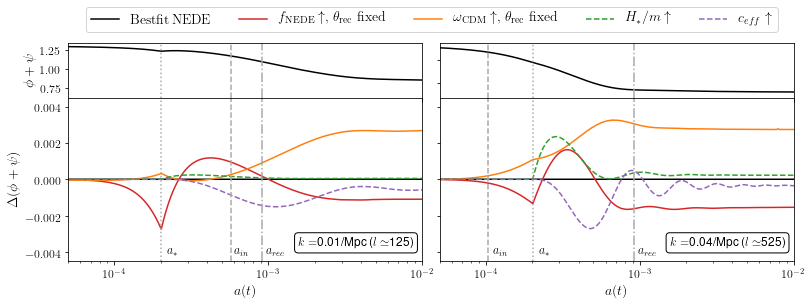

In [16]:
fs=14


plt.rcParams['figure.figsize'] = [13, 4]
fig, axs = plt.subplots(nrows=2, ncols=2,gridspec_kw={'height_ratios': [1, 3]})

ax0=axs[0,0]
ax0b=axs[0,1]
ax1=axs[1,0]
ax2=axs[1,1]

props = dict(boxstyle='round', facecolor='white', alpha=1)

#fig, ((ax1a,ax2a),(ax1,ax2)) = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0,wspace=.05)


ax0.semilogx(EDEbase_a,EDE_Weyl,color='black')
ax0.axvline(x=1/(EDEbase_z_decay+1),ls=':',c='darkgray')
ax0.axvline(x=EDEbase_a_rec,ls='dashdot',c='darkgray')
ax0.axvline(x=EDEbase_a_mode1,ls='dashed',c='darkgray')
ax0.set_xlim((0.00005,0.01))
ax0.set_xticklabels([])
#ax0.set_ylim((-0.004,.004))
#ax0.set_xlabel(r"$a(t)$", fontsize=fs)

ax0b.semilogx(EDEbase_a,EDE_Weyl_2,color='black')
ax0b.axvline(x=1/(EDEbase_z_decay+1),ls=':',c='darkgray')
ax0b.axvline(x=EDEbase_a_rec,ls='dashdot',c='darkgray')
ax0b.axvline(x=EDEbase_a_mode2,ls='dashed',c='darkgray')
ax0b.set_xlim((0.00005,0.01))
ax0b.set_xticklabels([])
ax0b.set_yticklabels([])

label0=r'$\rm Bestfit\, NEDE$'
label1=r'$f_{\rm NEDE}\uparrow ,\, \theta_{\rm rec}$ $\rm fixed$'
label2=r'$\omega_{\rm CDM} \uparrow,\, \theta_{\rm rec}$ $\rm fixed$'

ax1.semilogx(EDEbase_a,diff0,color='black',label=label0)
ax1.semilogx(EDEbase_a,diff2,c=color_sequence[3],label=label1)
ax1.semilogx(EDEbase_a,diff3,c=color_sequence[1],label=label2)
ax1.semilogx(EDEbase_a,diff4,c=color_sequence[2],ls='dashed',label=r'$H_*/m \uparrow$')
ax1.semilogx(EDEbase_a,diff5,c=color_sequence[4],ls='dashed',label=r'$c_{eff} \uparrow$')
ax1.axvline(x=1/(EDEbase_z_decay+1),ls=':',c='darkgray')
ax1.axvline(x=EDEbase_a_rec,ls='dashdot',c='darkgray')
ax1.axvline(x=EDEbase_a_mode1,ls='dashed',c='darkgray')
ax1.set_xlim((0.00005,0.01))
ax1.set_ylim((-0.0045,.0045))
ax1.set_xlabel(r"$a(t)$", fontsize=fs)



ax2.semilogx(EDEbase_a,diff0,color='black',label=r'Bestfit {New EDE}')
ax2.semilogx(EDEbase_a,diff2_2,c=color_sequence[3])
ax2.semilogx(EDEbase_a,diff3_2,c=color_sequence[1],label=r'$\omega_{CDM} \uparrow$')
ax2.semilogx(EDEbase_a,diff4_2,c=color_sequence[2],ls='dashed',label=r'$H_*/m \uparrow$')
ax2.semilogx(EDEbase_a,diff5_2,c=color_sequence[4],ls='dashed',label=r'$c_{eff} \uparrow$')
ax2.axvline(x=1/(EDEbase_z_decay+1),ls=':',c='darkgray')
ax2.axvline(x=EDEbase_a_rec,ls='dashdot',c='darkgray')
ax2.axvline(x=EDEbase_a_mode2,ls='dashed',c='darkgray')

ax2.set_xlim((0.00005,0.01))
ax2.set_ylim((-0.0045,.0045))
ax2.set_xlabel(r"$a(t)$", fontsize=fs)
ax2.set_yticklabels([])


plt.setp(ax0.get_yticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)


#ax1.legend(fontsize=12, ncol=2)
ax1.legend(bbox_to_anchor=(2.025 ,1.6), ncol=5,fontsize=fs)

ax1.set_ylabel(r'$\Delta (\phi + \psi)$', fontsize=fs)


ax0.set_ylabel(r'$ \phi + \psi$', fontsize=fs)


l1=EDEbaseDstar*float(klist[mode])
l2=EDEbaseDstar*float(klist[mode2])

ax1.text(0.65, .15, r'$k=$'+klist[mode]+'/Mpc ($l\simeq $'+str(int(l1/25)*25)+')' , transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

ax2.text(0.65, 0.15, r'$k=$'+klist[mode2]+'/Mpc ($l\simeq $'+str(int(l2/25)*25)+')', transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax1.text(0.56, 0.03, r'$a_{rec}$', transform=ax1.transAxes, fontsize=12)
ax2.text(0.56, 0.03, r'$a_{rec}$', transform=ax2.transAxes, fontsize=12)
ax1.text(0.28, 0.03, r'$a_{*}$', transform=ax1.transAxes, fontsize=12)
ax2.text(0.28, 0.03, r'$a_{*}$', transform=ax2.transAxes, fontsize=12)
ax1.text(0.47, 0.03, r'$a_{in}$', transform=ax1.transAxes, fontsize=12)
ax2.text(0.15, 0.03, r'$a_{in}$', transform=ax2.transAxes, fontsize=12)

ax1.locator_params(axis='y', nbins=5)


plt.savefig('Weyl.pdf',bbox_inches='tight')

In [18]:
cl_obs_tt=np.loadtxt('./data/COM_PowerSpect_CMB-TT-binned_R3.01.txt')
cl_obs_ee=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-EE-binned_R3.02.txt')
cl_obs_te=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TE-binned_R3.02.txt')
cl_obs_tt_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TT-full_R3.01.txt')
cl_obs_ee_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-EE-full_R3.01.txt')
cl_obs_te_full=np.loadtxt('../notebooks/data/COM_PowerSpect_CMB-TE-full_R3.01.txt')


lmin=2
l = np.array(range(lmin,2501))
#diffA = np.array(range(lmin,2501))
#diffB = np.array(range(lmin,2501))
factor = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2
factorE = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2


#pert = LCDM.get_perturbations()
cl_EDE_base = EDEbase.lensed_cl(2500)
cl_EDE3 = EDE3.lensed_cl(2500)
cl_EDE4 = EDE4.lensed_cl(2500)
cl_EDE7 = EDE7.lensed_cl(2500)

diffA = -(cl_EDE_base['tt'][lmin:]-cl_EDE3['tt'][lmin:])/cl_EDE_base['tt'][lmin:]
diffB = -(cl_EDE_base['tt'][lmin:]-cl_EDE4['tt'][lmin:])/cl_EDE_base['tt'][lmin:]
diffC = -(cl_EDE_base['tt'][lmin:]-cl_EDE7['tt'][lmin:])/cl_EDE_base['tt'][lmin:]

cl_EDE_tt=np.interp(cl_obs_tt[:,0],l,factor*cl_EDE_base['tt'][lmin:])
resid = -(cl_EDE_tt-cl_obs_tt[:,1])/cl_EDE_tt
resid_err = np.transpose(cl_obs_tt[:,2:4])
resid_err[0,:]=resid_err[0,:]/cl_EDE_tt
resid_err[1,:]=resid_err[1,:]/cl_EDE_tt

l2max=28
cl_EDE2_tt=np.interp(cl_obs_tt_full[:l2max,0],l,factor*cl_EDE_base['tt'][lmin:])
resid2 = -(cl_EDE2_tt-cl_obs_tt_full[:l2max,1])/cl_EDE2_tt
resid2_err = np.transpose(cl_obs_tt_full[:l2max,2:4])
resid2_err[0,:]=resid2_err[0,:]/cl_EDE2_tt
resid2_err[1,:]=resid2_err[1,:]/cl_EDE2_tt




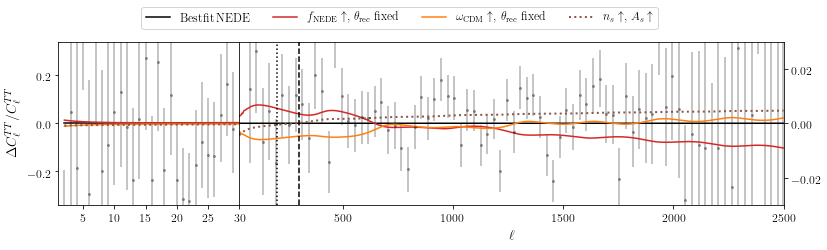

In [19]:

ms=2
plt.rcParams['figure.figsize'] = [13, 3.]
fig, axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [1, 3]})

fig.subplots_adjust(wspace=0)
ax1 = axs[0]
ax1.plot(l,np.zeros(l.shape) ,c='black')

ax1.plot(l[:30], diffA[:30],c=color_sequence[3])
ax1.plot(l[:30], diffB[:30],c=color_sequence[1])
ax1.plot(l[:30], diffC[:30],c=color_sequence[5],ls=':',lw=2)
ax1.errorbar(cl_obs_tt_full[:l2max,0], resid2,yerr=resid2_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax1.set_ylim(-0.34,0.34)
ax1.set_xlim(1,30)
#ax1.tick_params(labelbottom=False) 


ax2 = axs[1]
ax2.yaxis.tick_right()
ax2.plot(l,np.zeros(l.shape) ,c='black',label=label0)

ax2.plot(l, diffA,c=color_sequence[3],label=label1)
ax2.plot(l, diffB,c=color_sequence[1],label=label2)
ax2.plot(l, diffC,c=color_sequence[5],ls=':',label=r'$n_s \uparrow, \, A_s \uparrow $',lw=2)
ax2.errorbar(cl_obs_tt[:,0], resid,yerr=resid_err,fmt='o',color='black', markersize=ms,alpha=0.3)

#ax2.tick_params(labelbottom=False) 
ax2.set_ylim(-0.03,0.03)
ax2.set_xlim(30,2500)




plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)

ax1.locator_params(axis='y', nbins=6)
ax2.locator_params(axis='y', nbins=4)
ax2.legend(fontsize=12, ncol=4,bbox_to_anchor=(0.78, 1.04))

ax2.set_xlabel(r'$\ell$',fontsize=fs)
ax1.set_ylabel(r'$\Delta C^{TT}_\ell / C^{TT}_\ell$', fontsize=fs)



#mode that entered sound horizon at time of decay:

l_enter_rs=(l_k(1/rs_z(EDEbase_z_decay,EDEbase_bg)[1]))
ax2.axvline(x=l_enter_rs,ls='--',c='black')


#mode that entered particle horizon at time of decay:
l_enter_ph=(l_z(EDEbase_z_decay))
ax2.axvline(x=l_enter_ph,ls=':',c='black')


plt.savefig('residuals_params.pdf',bbox_inches='tight')

plt.show()
plt.close('all')

# make these tick labels invisible
#ax2.setp(ax2.get_xticklabels(), visible=False)

In [ ]:
#omega_b, omega_cdm, h,  ln10^{10}A_s,    n_s, frac_EDE,  log10mass,  tau_reio,trigger
EDE_params=[2.273478e-02,1.246824e-01,7.036764e-01,3.064645e+0,9.832775e-01,4.728907e-02,4.107612e+00,5.784156e-02,0.2]
lmin1=100
plt.rcParams['figure.figsize'] = [8, 16]
ax1 = plt.subplot(311)
for i in range(0,4):
    frac_EDE_i=0.01+i*0.05
    trigger_i = 0.2
    EDE_Omega_EDE_i=frac_EDE_i*(10**EDE_params[6])**2*trigger_i**2 /(EDE_params[2] * 10**5 / (2.99792458*10**8))**2
    EDE_i = Class()
    EDE_i.set({'Omega_EDE2': EDE_Omega_EDE_i,'EDE2_clock_mass' : (10**EDE_params[6]),'Junction_tag':'1','EDE2_clock_ini':0.00001,'Bubble_trigger_H_over_m':trigger_i,'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':'0.0002,0.001,0.015,0.02,0.1','background_verbose':'4','omega_b':EDE_params[0],'omega_cdm':EDE_params[1],'h':EDE_params[2],'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7]})
    EDE_i.compute()
    EDE_i_pert = EDE_i.get_perturbations()
    cl_EDE_i = EDE_i.lensed_cl(2500)
    plt.plot(l,cl_EDE_i['tt'][lmin1:]*factor[lmin1-2:])
    EDE_i.struct_cleanup()
    
   
plt.show()

In [20]:
#BAO

H_LCDM=LCDM_bg['H [1/Mpc]']
z_LCDM=LCDM_bg['z']
a_LCDM=1./(z_LCDM+1)
rs_LCDM=LCDM.get_current_derived_parameters(['rs_d'])['rs_d']
h_LCDM=LCDM.get_current_derived_parameters(['h'])
print(h_LCDM,rs_LCDM)

H_EDE=EDE_bg['H [1/Mpc]']
z_EDE=EDE_bg['z']
a_EDE=1./(z_EDE+1)
rs_EDE=EDE.get_current_derived_parameters(['rs_d'])['rs_d']
h_EDE=EDE.get_current_derived_parameters(['h'])
print(h_EDE,rs_EDE)

H_DR=DR_bg['H [1/Mpc]']
z_DR=DR_bg['z']
a_DR=1./(z_DR+1)
rs_DR=DR.get_current_derived_parameters(['rs_d'])['rs_d']
h_DR=DR.get_current_derived_parameters(['h'])
print(h_DR,rs_DR)


#Load OEDE from file
H_OEDE=np.load('./OEDE/H_OEDE.npy')
rs_OEDE=np.load('./OEDE/rs_OEDE.npy')
a_OEDE=np.load('./OEDE/a_OEDE.npy')
print(rs_OEDE)


#Load ADE from file
H_ADE=np.load('./ADE/H_ADE.npy')
rs_ADE=np.load('./ADE/rs_ADE.npy')
a_ADE=np.load('./ADE/a_ADE.npy')
print(rs_ADE)


({'h': 0.681615}, 147.38315359432752)
({'h': 0.7146053}, 140.87516467863782)
({'h': 0.6938808}, 145.14847289675478)
140.057524655
142.340173558


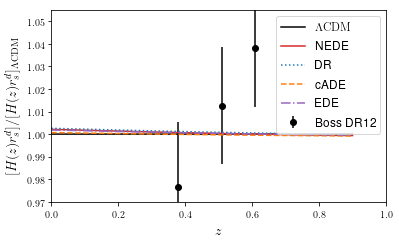

In [21]:
zvec=np.linspace(0.0001,.9,10000)
H_LCDM_vec = np.interp(1./(zvec+1),a_LCDM,H_LCDM)
H_EDE_vec = np.interp(1./(zvec+1),a_EDE,H_EDE)
H_DR_vec = np.interp(1./(zvec+1),a_DR,H_DR)
H_OEDE_vec = np.interp(1./(zvec+1),a_OEDE,H_OEDE)
H_ADE_vec = np.interp(1./(zvec+1),a_ADE,H_ADE)


fid = 147.78
c = 299792.458;
fac1=fid /(rs_LCDM * c)


z1,z2,z3=0.38,0.51,0.61
BOSSDR12x=np.array([z1,z2,z3])
BOSSDR12y=np.array([81.2087 *fac1 /(np.interp(1./(z1+1),a_LCDM,H_LCDM)),90.9029 *fac1 /(np.interp(1./(z2+1),a_LCDM,H_LCDM)),98.9647 *fac1 /(np.interp(1./(z3+1),a_LCDM,H_LCDM))])
BOSSDR12yerr=np.array([5.60873**(1./2.) *fac1 /(np.interp(1./(z1+1),a_LCDM,H_LCDM)),5.42327**(1./2.) *fac1 /(np.interp(1./(z2+1),a_LCDM,H_LCDM)),6.25936**(1./2.) *fac1 /(np.interp(1./(z3+1),a_LCDM,H_LCDM))])

plt.rcParams['figure.figsize'] = [6, 12]
ax1 = plt.subplot(311)
plt.plot(zvec,H_LCDM_vec/H_LCDM_vec, label=r'$\Lambda {\rm CDM}$',c='black')
plt.plot(zvec,H_EDE_vec*rs_EDE/(H_LCDM_vec*rs_LCDM),label=r'NEDE',c=color_sequence[3])
plt.plot(zvec,H_DR_vec*rs_DR/(H_LCDM_vec*rs_LCDM),label=r'DR',c=color_sequence[0],ls=':')
plt.plot(zvec,H_ADE_vec*rs_ADE/(H_LCDM_vec*rs_LCDM),label=r'cADE',c=color_sequence[1],ls='--')
plt.plot(zvec,H_OEDE_vec*rs_OEDE/(H_LCDM_vec*rs_LCDM),label=r'EDE',c=color_sequence[4],ls='dashdot')
plt.xlabel(r'$z$',fontsize=fs)
plt.ylabel(r'$[H(z) r_s^d]/[H(z) r_s^d]_{\Lambda{\rm CDM}}$', fontsize=fs)
plt.errorbar(BOSSDR12x,BOSSDR12y,yerr=BOSSDR12yerr,fmt='ko',label=r'Boss DR12')
ax1.legend(fontsize=12)
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)
plt.ylim(0.97,1.055)
plt.xlim(0.,1)

plt.savefig('BAO1.pdf',bbox_inches='tight')
plt.show()

In [22]:
from scipy.integrate import trapz


def DV(z,a,H):
    zvec1=np.linspace(0.00001,z,1000)
    int_vec=np.interp(1./(zvec1+1),a,1./H)
    Dm=trapz(int_vec,zvec1)
    return (z*Dm**2./np.interp(1./(z+1),a,H))**(1./3.)


def DVdrdnorm(z,DMdrd,Hrd):
    return (c*z*DMdrd**2./Hrd)**(1./3.)/(DV(z,a_LCDM,H_LCDM)/rs_LCDM)

DV(1,a_LCDM,H_LCDM) 

3052.7490506984286

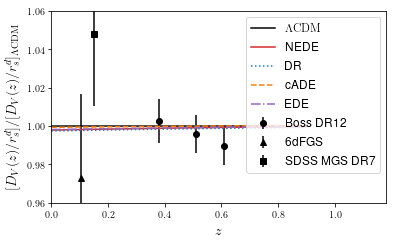

In [23]:
zvec=np.linspace(0.0001,.9,10000)
y_LCDM=np.zeros(zvec.size)
y_EDE=np.zeros(zvec.size)
y_DR=np.zeros(zvec.size)
y_OEDE=np.zeros(zvec.size)
y_ADE=np.zeros(zvec.size)

for i in range(0,zvec.size):
    y_LCDM[i]=1.
    y_EDE[i]=(DV(zvec[i],a_EDE,H_EDE)/rs_EDE)/(DV(zvec[i],a_LCDM,H_LCDM)/rs_LCDM)
    y_DR[i]=(DV(zvec[i],a_DR,H_DR)/rs_DR)/(DV(zvec[i],a_LCDM,H_LCDM)/rs_LCDM)
    y_OEDE[i]=(DV(zvec[i],a_OEDE,H_OEDE)/rs_OEDE)/(DV(zvec[i],a_LCDM,H_LCDM)/rs_LCDM)
    y_ADE[i]=(DV(zvec[i],a_ADE,H_ADE)/rs_ADE)/(DV(zvec[i],a_LCDM,H_LCDM)/rs_LCDM)


DMdrdI = (1512.39/fid)
errDMdrdI = (624.0**(1./2.)/fid)
HrdI = 81.2087*fid
errHrdI = 5.60873**(1./2.)*fid
covI = 23.279

DMdrdII = (1975.22/ fid)
errDMdrdII = (905**(1./2.)/fid)
HrdII = 90.9029*fid
errHrdII = 5.42327**(1./2.)*fid
covII = 29.3392

DMdrdIII = (2306.68/ fid)
errDMdrdIII = (1375.12**(1./2.)/fid)
HrdIII = 98.9647 * fid
errHrdIII = 6.25936**(1./2.)*fid
covIII = 40.4327



DVdrdInorm = DVdrdnorm(z1,DMdrdI,HrdI)
errDVdrdI = DVdrdInorm*((2./3. * errDMdrdI/DMdrdI)**2. + (1./3.* errHrdI / HrdI)**2. - 4./9. * covI * (1./DMdrdI)*(1. / HrdI))**(1./2.)

DVdrdIInorm = DVdrdnorm(z2,DMdrdII,HrdII)
errDVdrdII = DVdrdIInorm*((2./3. * errDMdrdII/DMdrdII)**2. + (1./3.* errHrdII / HrdII)**2. - 4./9. * covII * (1./DMdrdII)*(1. / HrdII))**(1./2.)

DVdrdIIInorm = DVdrdnorm(z3,DMdrdIII,HrdIII)
errDVdrdIII = DVdrdIIInorm*((2./3. * errDMdrdIII/DMdrdIII)**2. + (1./3.* errHrdIII / HrdIII)**2. - 4./9. * covIII * (1./DMdrdIII)*(1. / HrdIII))**(1./2.)
    
#(*Uses 6FD (arXiv:1106.3366v1) and MGS (arXiv:1409.3242v1) samples / intended to be compatible with BOSS DR12 (which is z>0.2)*)


#(* Note that MontePyhton uses a rescaled value!*)

z4 = .106
DVdrdIVnorm = (1/ 0.336) / (DV(z4,a_LCDM,H_LCDM)/rs_LCDM)
errDVdrdIVnorm = 0.015/ (0.336)**2. / (DV(z4,a_LCDM,H_LCDM)/rs_LCDM)

#(*SDSS DR7 MGS,Ross et al.1409.3242v1*)
z5 = .15
DVdrdVnorm = 4.47 / (DV(z5,a_LCDM,H_LCDM)/rs_LCDM)
errDVdrdVnorm = 0.16    / (DV(z5,a_LCDM,H_LCDM)/rs_LCDM)
    


ax1 = plt.subplot(311)

plt.plot(zvec,y_LCDM, label=r'$\Lambda {\rm CDM}$',c='black')
plt.plot(zvec,y_EDE,label=r'NEDE',c=color_sequence[3])
plt.plot(zvec,y_DR,label=r'DR',c=color_sequence[0],ls=':')
plt.plot(zvec,y_ADE,label=r'cADE',c=color_sequence[1],ls='--')
plt.plot(zvec,y_OEDE,label=r'EDE',c=color_sequence[4],ls='dashdot')
plt.xlabel(r'$z$',fontsize=fs)
plt.ylabel(r'$[D_V(z) / r^d_s]/[D_V(z) / r^d_s]_{\Lambda {\rm CDM}}$', fontsize=fs)
plt.errorbar([z1,z2,z3],[DVdrdInorm,DVdrdIInorm,DVdrdIIInorm],yerr=[errDVdrdI,errDVdrdII,errDVdrdIII],fmt='ko',label=r'Boss DR12')
plt.errorbar(z4,DVdrdIVnorm,yerr=errDVdrdIVnorm,fmt='k^',label=r'6dFGS')
plt.errorbar(z5,DVdrdVnorm,yerr=errDVdrdVnorm,fmt='ks',label=r'SDSS MGS DR7')
ax1.legend(fontsize=12)
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)
plt.ylim(0.96,1.06)
plt.xlim(0.,1.18)
plt.savefig('BAO2.pdf',bbox_inches='tight')
plt.show()

In [25]:
from scipy.integrate import quad

In [26]:

EDE_z_decay=EDE_derived['z_decay']
EDE_z_rec=EDE_derived['z_rec']

print(EDE.rs_drag())
print(pos_rec,EDE_z_decay,rs_z(EDE_z_rec,EDE_bg),1/0.04)

140.875164679


NameError: name 'pos_rec' is not defined

In [24]:
#Trigger parameter

CLASS_FACTOR=-2

kstr='0.01,0.02,0.04,0.08'
klist=kstr.split(',')


steps=101
val_delta=np.zeros((steps,len(klist)+1))
val_delta_sh=np.zeros((steps,len(klist)+1))
val_theta=np.zeros((steps,len(klist)+1))
val_theta_sh=np.zeros((steps,len(klist)+1))

bg_step=1.e-3


for i in range(0,steps):
    
    if (int(i/10)*10==i):
        print(i)
    
    EDEtrig = Class()
    
    factor  = 0.75 + i * .5/steps
    
    trigger = EDE_params[8]*factor
    mass    = (10**EDE_params[6])/factor

    #EDEbase.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2*0.00000000001 ,'EDE2_clock_mass' : (10**EDE_params[6]),'EDE2_clock_ini':0.000001,'Bubble_trigger_H_over_m':EDE_params[8],'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes','k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2','omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1],'h':LCDM_params[2],'ln10^{10}A_s':LCDM_params[3],'n_s':LCDM_params[4],'tau_reio':LCDM_params[5]})
    EDEtrig.set({'sub_dom_cond':0.000001,'back_integration_stepsize':bg_step,'decay_res_enhancement':100,
                 'Junction_tag':1,'perturb_integration_stepsize':0.5,'three_eos_EDE':EDE_params[9],
                 'three_ceff2_EDE':EDE_params[10],'three_cvis2_EDE':0,'Omega_EDE2': EDE_Omega_EDE2 ,
                 'EDE2_clock_mass' : mass,'EDE2_clock_ini':0.00001,'Bubble_trigger_H_over_m':trigger,
                 'start_small_k_at_tau_c_over_tau_h':0.0000001,'output':'tCl,pCl,lCl','lensing':'yes',
                 'k_output_values':kstr,'background_verbose':'4','perturbations_verbose':'2',
                 'omega_b':EDE_params[0],'omega_cdm':EDE_params[1],'h':EDE_params[2],
                 'ln10^{10}A_s':EDE_params[3],'n_s':EDE_params[4],'tau_reio':EDE_params[7],
                 'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm})
    

    EDEtrig.compute()
    EDEtrig_bg = EDEtrig.get_background()
    EDEtrig_derived=EDEtrig.get_current_derived_parameters(['z_decay','z_rec','H0','100*theta_s'])
    EDEtrig_pert = EDEtrig.get_perturbations()
    EDEtrig_sarray = EDEtrig_pert['scalar']

    
    z_arr = EDEtrig_bg['z']
    H_bg=EDEtrig_bg['H [1/Mpc]']
    decay_pos2 = np.argmin(np.abs(z_arr - EDEtrig_derived["z_decay"]))
    
    
    #phi_prime_bg=EDE_bg["phi'_trigger"]
    

    for j in range(0,len(klist)):
        EDEtrig_sdict = EDEtrig_sarray[j]
        delta_NEDE    = EDEtrig_sdict['delta_NEDE']
        theta_NEDE    = EDEtrig_sdict['theta_NEDE']
        a_arr         = EDEtrig_sdict['a']
        decay_pos=np.argmin(np.abs(a_arr-1./(EDEtrig_derived["z_decay"]+1.)))
        
        delta_NEDE_star=delta_NEDE[decay_pos+1]
        theta_NEDE_star=theta_NEDE[decay_pos+1]
        delta_NEDE_star_sh=-(3+EDE_params[9])/(3*28)*(a_arr[decay_pos]*H_bg[decay_pos2])**(-2.0)*float(klist[j])**2
        theta_NEDE_star_sh=1./(84)*(a_arr[decay_pos]*H_bg[decay_pos2])**(-3.0)*float(klist[j])**4
        
        
        val_delta[i,j+1]=delta_NEDE_star/CLASS_FACTOR
        val_delta_sh[i,j+1]=delta_NEDE_star_sh
        val_theta[i,j+1]=theta_NEDE_star/CLASS_FACTOR
        val_theta_sh[i,j+1]=theta_NEDE_star_sh
    val_delta[i,0]=trigger
    val_theta[i,0]=trigger
    val_delta_sh[i,0]=trigger
    val_theta_sh[i,0]=trigger
        #print(delta_NEDE_star)

    aH=H_bg[decay_pos2]*1/(z_arr[decay_pos2]+1)
    z_star=EDEtrig_derived["z_decay"]
    D_star=EDEtrig.angular_distance(EDEtrig_derived['z_rec'])*(EDEtrig_derived['z_rec']+1)
    #print(H_bg[decay_pos2],delta_NEDE[decay_pos+1],delta_EDE_star,phi_prime_bg[decay_pos2],trigger,z_arr[decay_pos2],1./a_arr[decay_pos]-1,delta_trigger[decay_pos])
    EDEtrig.struct_cleanup()

0
10
20
30
40
50
60
70
80
90
100


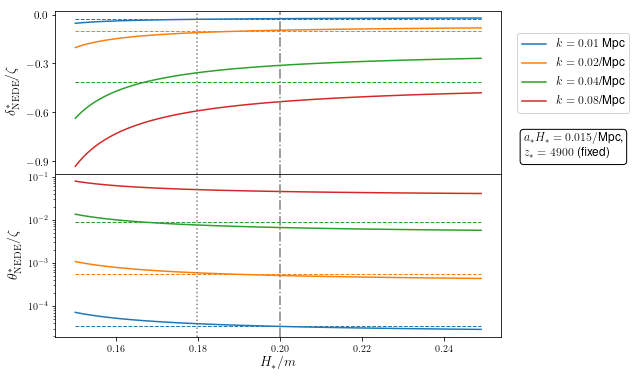

In [25]:
plt.close("all")
plt.rcParams['figure.figsize'] = [8, 6]


fig, axs = plt.subplots(nrows=2, ncols=1,gridspec_kw={'height_ratios': [1, 1]})

ax1=axs[0]
ax2=axs[1]

props = dict(boxstyle='round', facecolor='white', alpha=1)

#fig, ((ax1a,ax2a),(ax1,ax2)) = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0,wspace=.05)

ax1.plot(val_delta[:,0], val_delta[:,1],label=r'$k='+str(klist[0])+'$ Mpc',c=color_sequence[0])
ax1.plot(val_delta_sh[:,0], val_delta_sh[:,1],c=color_sequence[0],ls='--',lw=1)
ax1.plot(val_delta[:,0], val_delta[:,2],label=r'$k='+str(klist[1])+'$/Mpc',c=color_sequence[1])
ax1.plot(val_delta_sh[:,0], val_delta_sh[:,2],c=color_sequence[1],ls='--',lw=1)
ax1.plot(val_delta[:,0], val_delta[:,3],label=r'$k='+str(klist[2])+'$/Mpc',c=color_sequence[2])
ax1.plot(val_delta_sh[:,0], val_delta_sh[:,3],c=color_sequence[2],ls='--',lw=1)
ax1.plot(val_delta[:,0], val_delta[:,4],label=r'$k='+str(klist[3])+'$/Mpc',c=color_sequence[3])
#ax1.plot(val_delta_sh[:,0], val_delta_sh[:,4],c=color_sequence[3],ls='--',lw=1)


ax2.plot(val_theta[:,0], val_theta[:,1],label=r'$k='+str(klist[0])+'$',c=color_sequence[0])
ax2.plot(val_theta_sh[:,0], val_theta_sh[:,1],ls='--',c=color_sequence[0],lw=1)

ax2.semilogy(val_theta[:,0], val_theta[:,2],label=r'$k='+str(klist[1])+'$',c=color_sequence[1])
ax2.semilogy(val_theta_sh[:,0], val_theta_sh[:,2],ls='--',c=color_sequence[1],lw=1)
ax2.semilogy(val_theta[:,0], val_theta[:,3],label=r'$k='+str(klist[2])+'$',c=color_sequence[2])
ax2.semilogy(val_theta_sh[:,0], val_theta_sh[:,3],ls='--',c=color_sequence[2],lw=1)
ax2.semilogy(val_theta[:,0], val_theta[:,4],label=r'$k='+str(klist[3])+'$',c=color_sequence[3])

ax1.axvline(x=0.179799,ls=':',c='gray')
ax2.axvline(x=0.179799,ls=':',c='gray')
ax1.axvline(x=EDE_params[8],ls='-.',c='gray')
ax2.axvline(x=EDE_params[8],ls='-.',c='gray')
#plt.xlim((0.000001,1))

#plt.xlabel(r"$a(t)$")
#plt.ylim((0.05,1e20))


ax1.text(1.05, 0.25, r'$a_* H_* = '+str(float(int(aH*1000))/1000)+'/$Mpc, \n$z_*='+str(int(z_star/100)*100)+'$ (fixed)' , transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax2.set_xlabel(r'$H_*/m$',fontsize=fs)
ax1.set_ylabel(r'$\delta^*_{\rm NEDE}/\zeta$', fontsize=fs)
ax2.set_ylabel(r'$\theta^*_{\rm NEDE}/\zeta$', fontsize=fs)
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
#ax2.yaxis.set_major_locator(plt.MaxNLocator(4))

#ax1.legend(fontsize=14)
ax1.legend(fontsize=12, ncol=1,bbox_to_anchor=(1.3, .9))
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.savefig('delta_NEDE_star.pdf',bbox_inches='tight')
plt.show()
plt.close()

In [ ]:

D_star*0.015
